In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import io
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# **1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.**

In [2]:
df = pd.read_excel('Election_Data.xlsx').drop('Unnamed: 0',axis=1)

In [ ]:
df.shape

(1525, 9)

In [ ]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [ ]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [ ]:
df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [3]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [4]:
df.drop_duplicates(inplace=True)

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [ ]:
df.shape

(1517, 9)

In [5]:
replace = {"vote"  :  { "Conservative" : 1, "Labour" : 0}, "gender" : {"male" : 1 , "female" : 0}}

In [6]:
df = df.replace(replace)

In [ ]:
print(df['vote'].value_counts())
df['vote'].value_counts(normalize = True)

0    1057
1     460
Name: vote, dtype: int64


0    0.69677
1    0.30323
Name: vote, dtype: float64

In [ ]:
print(df['gender'].value_counts())
df['gender'].value_counts(normalize = True)

0    808
1    709
Name: gender, dtype: int64


0    0.53263
1    0.46737
Name: gender, dtype: float64

In [ ]:
np.isinf(df).sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [7]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)


[]
['vote', 'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']


# **1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.**

### **Univariate Analysis**

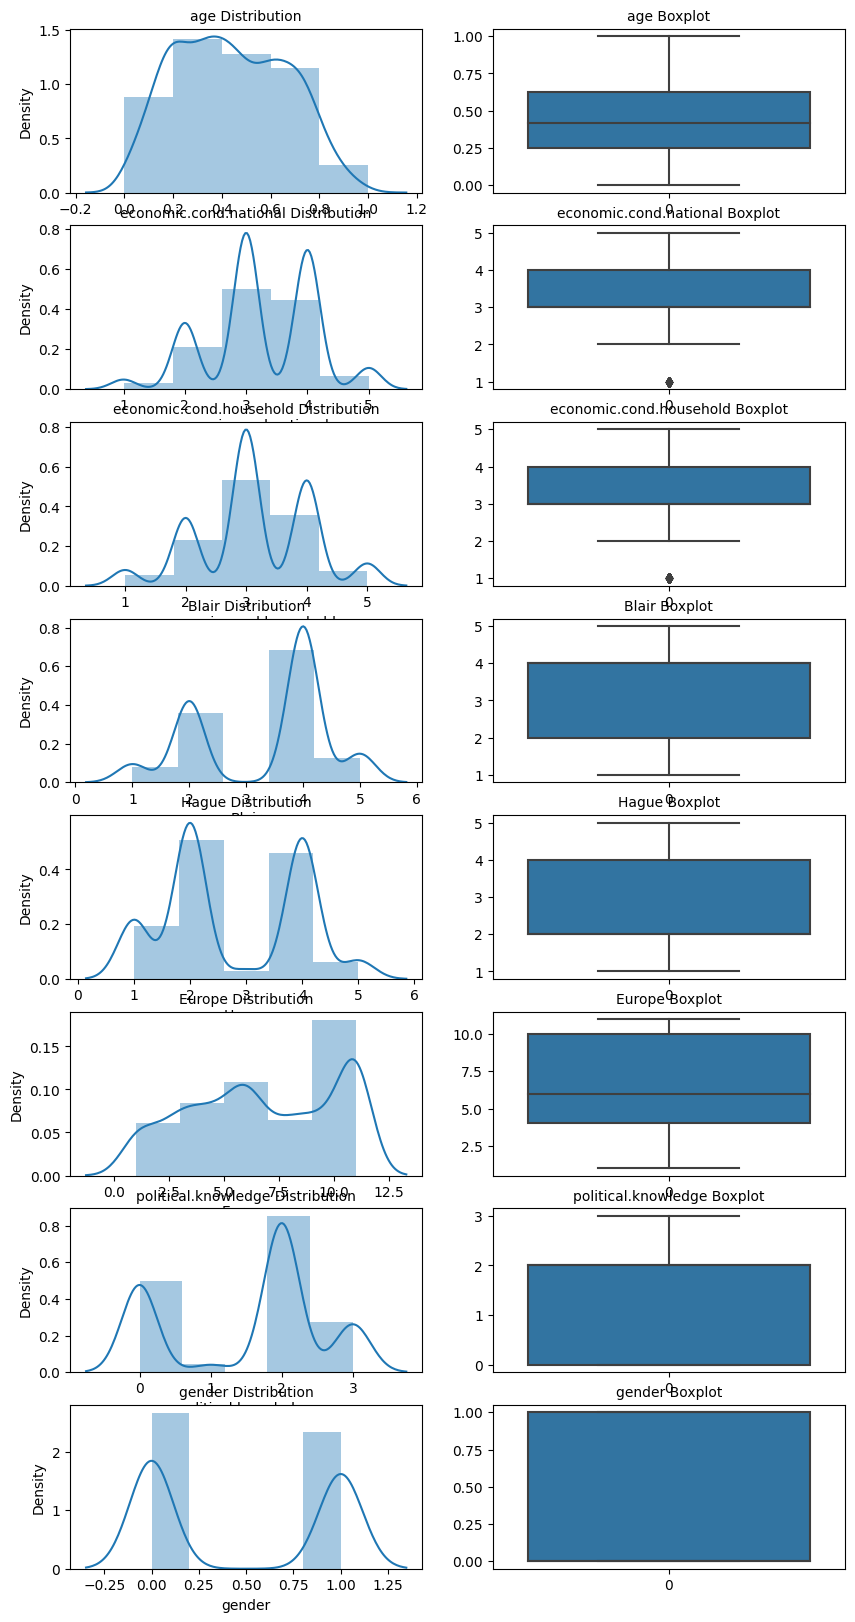

In [ ]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['age'] , ax=axes[0][0],bins=5)
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.national'] ,bins=5, ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'] ,bins=5, ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] ,bins=5, ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)


a = sns.distplot(df['Hague'] ,bins=5, ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=10)


a = sns.distplot(df['Europe'] ,bins=5, ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(df['political.knowledge'] ,bins=5, ax=axes[6][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political.knowledge Boxplot",fontsize=10)


a = sns.distplot(df['gender'] ,bins=5, ax=axes[7][0])
a.set_title("gender Distribution",fontsize=10)

a = sns.boxplot(df['gender'] , orient = "v" , ax=axes[7][1])
a.set_title("gender Boxplot",fontsize=10);

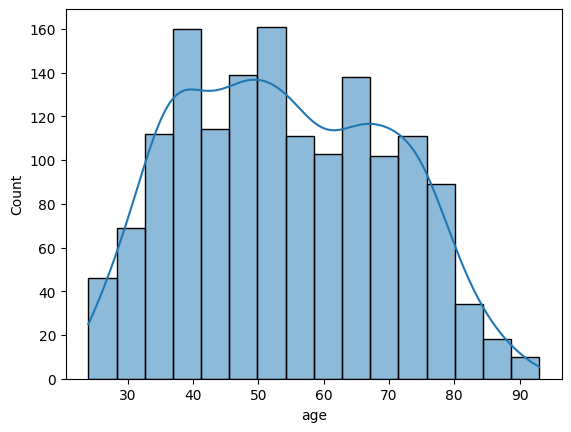

In [ ]:
sns.histplot(data=df, x='age', kde=True);

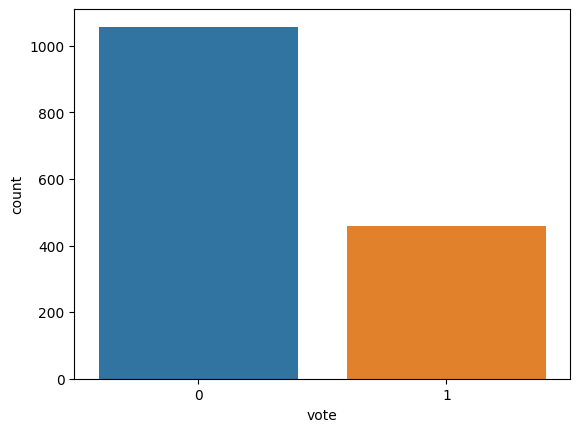

In [ ]:
sns.countplot(data=df, x='vote');

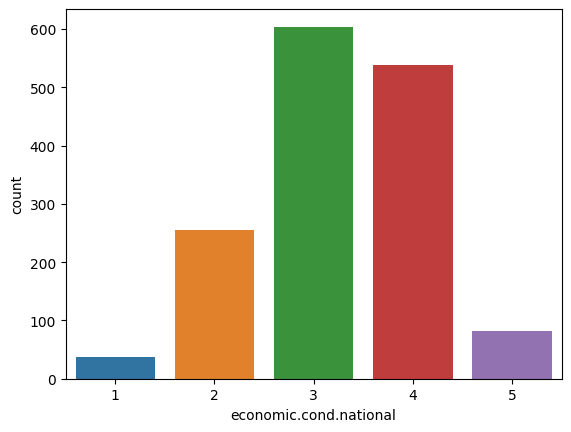

In [ ]:
sns.countplot(data=df, x='economic.cond.national');

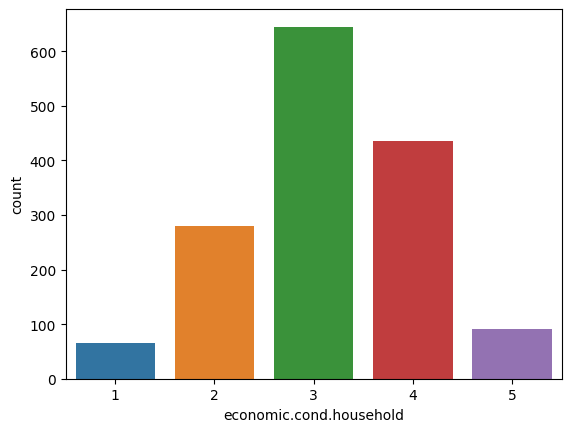

In [ ]:
sns.countplot(data=df, x='economic.cond.household');

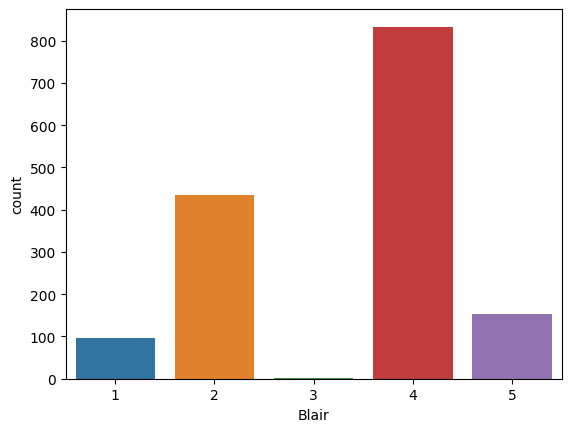

In [ ]:
sns.countplot(data=df, x='Blair');

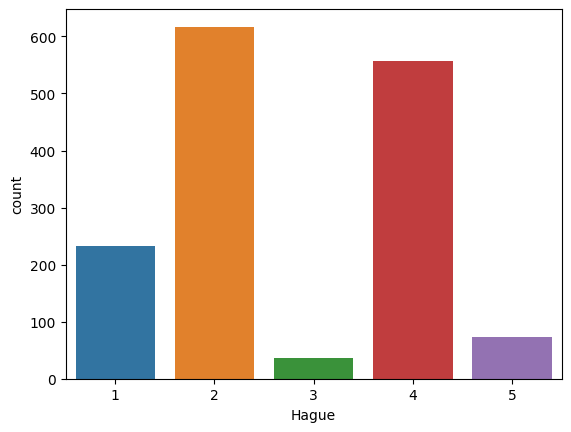

In [ ]:
sns.countplot(data=df, x='Hague');

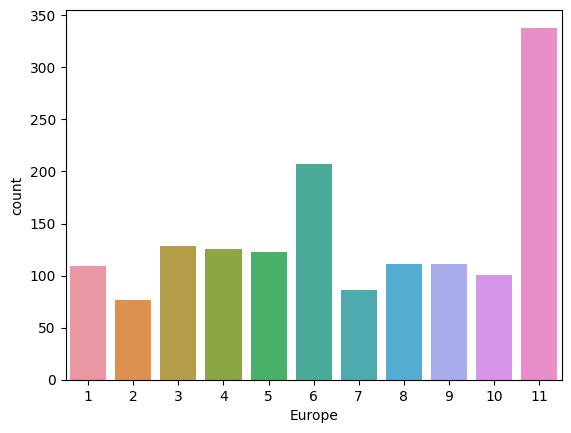

In [ ]:
sns.countplot(data=df, x='Europe');

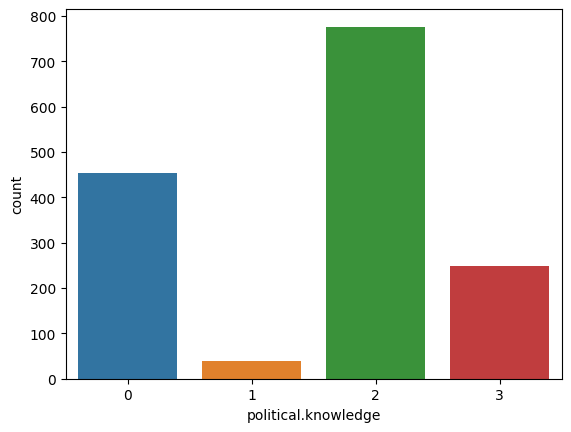

In [ ]:
sns.countplot(data=df, x='political.knowledge');

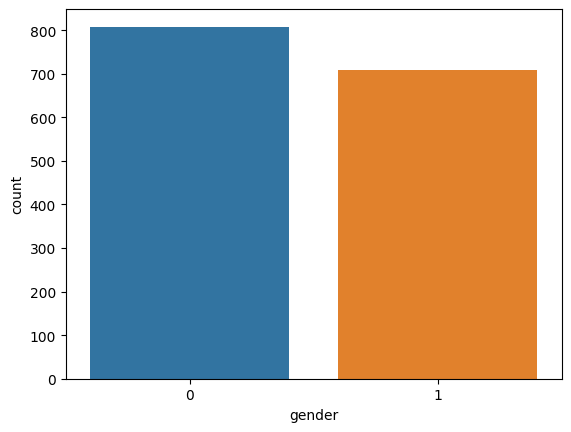

In [ ]:
sns.countplot(data=df, x='gender');

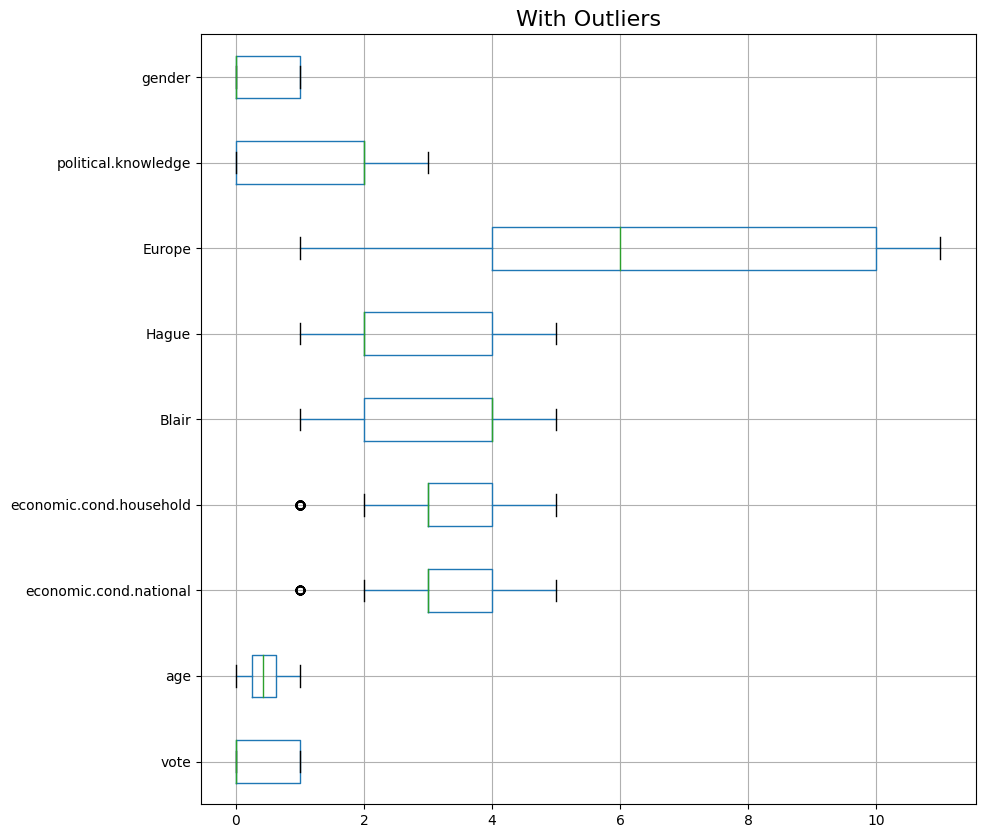

In [ ]:
cont = df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

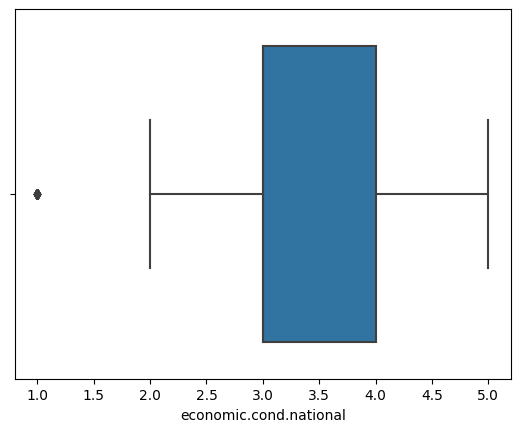

In [ ]:
sns.boxplot(data=df, x='economic.cond.national');

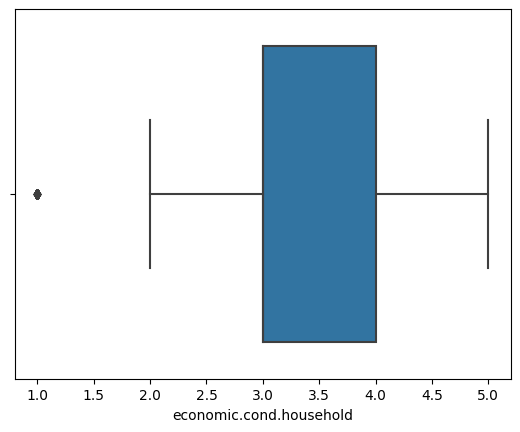

In [ ]:
sns.boxplot(data=df, x='economic.cond.household');

# **Bivariate Analysis**

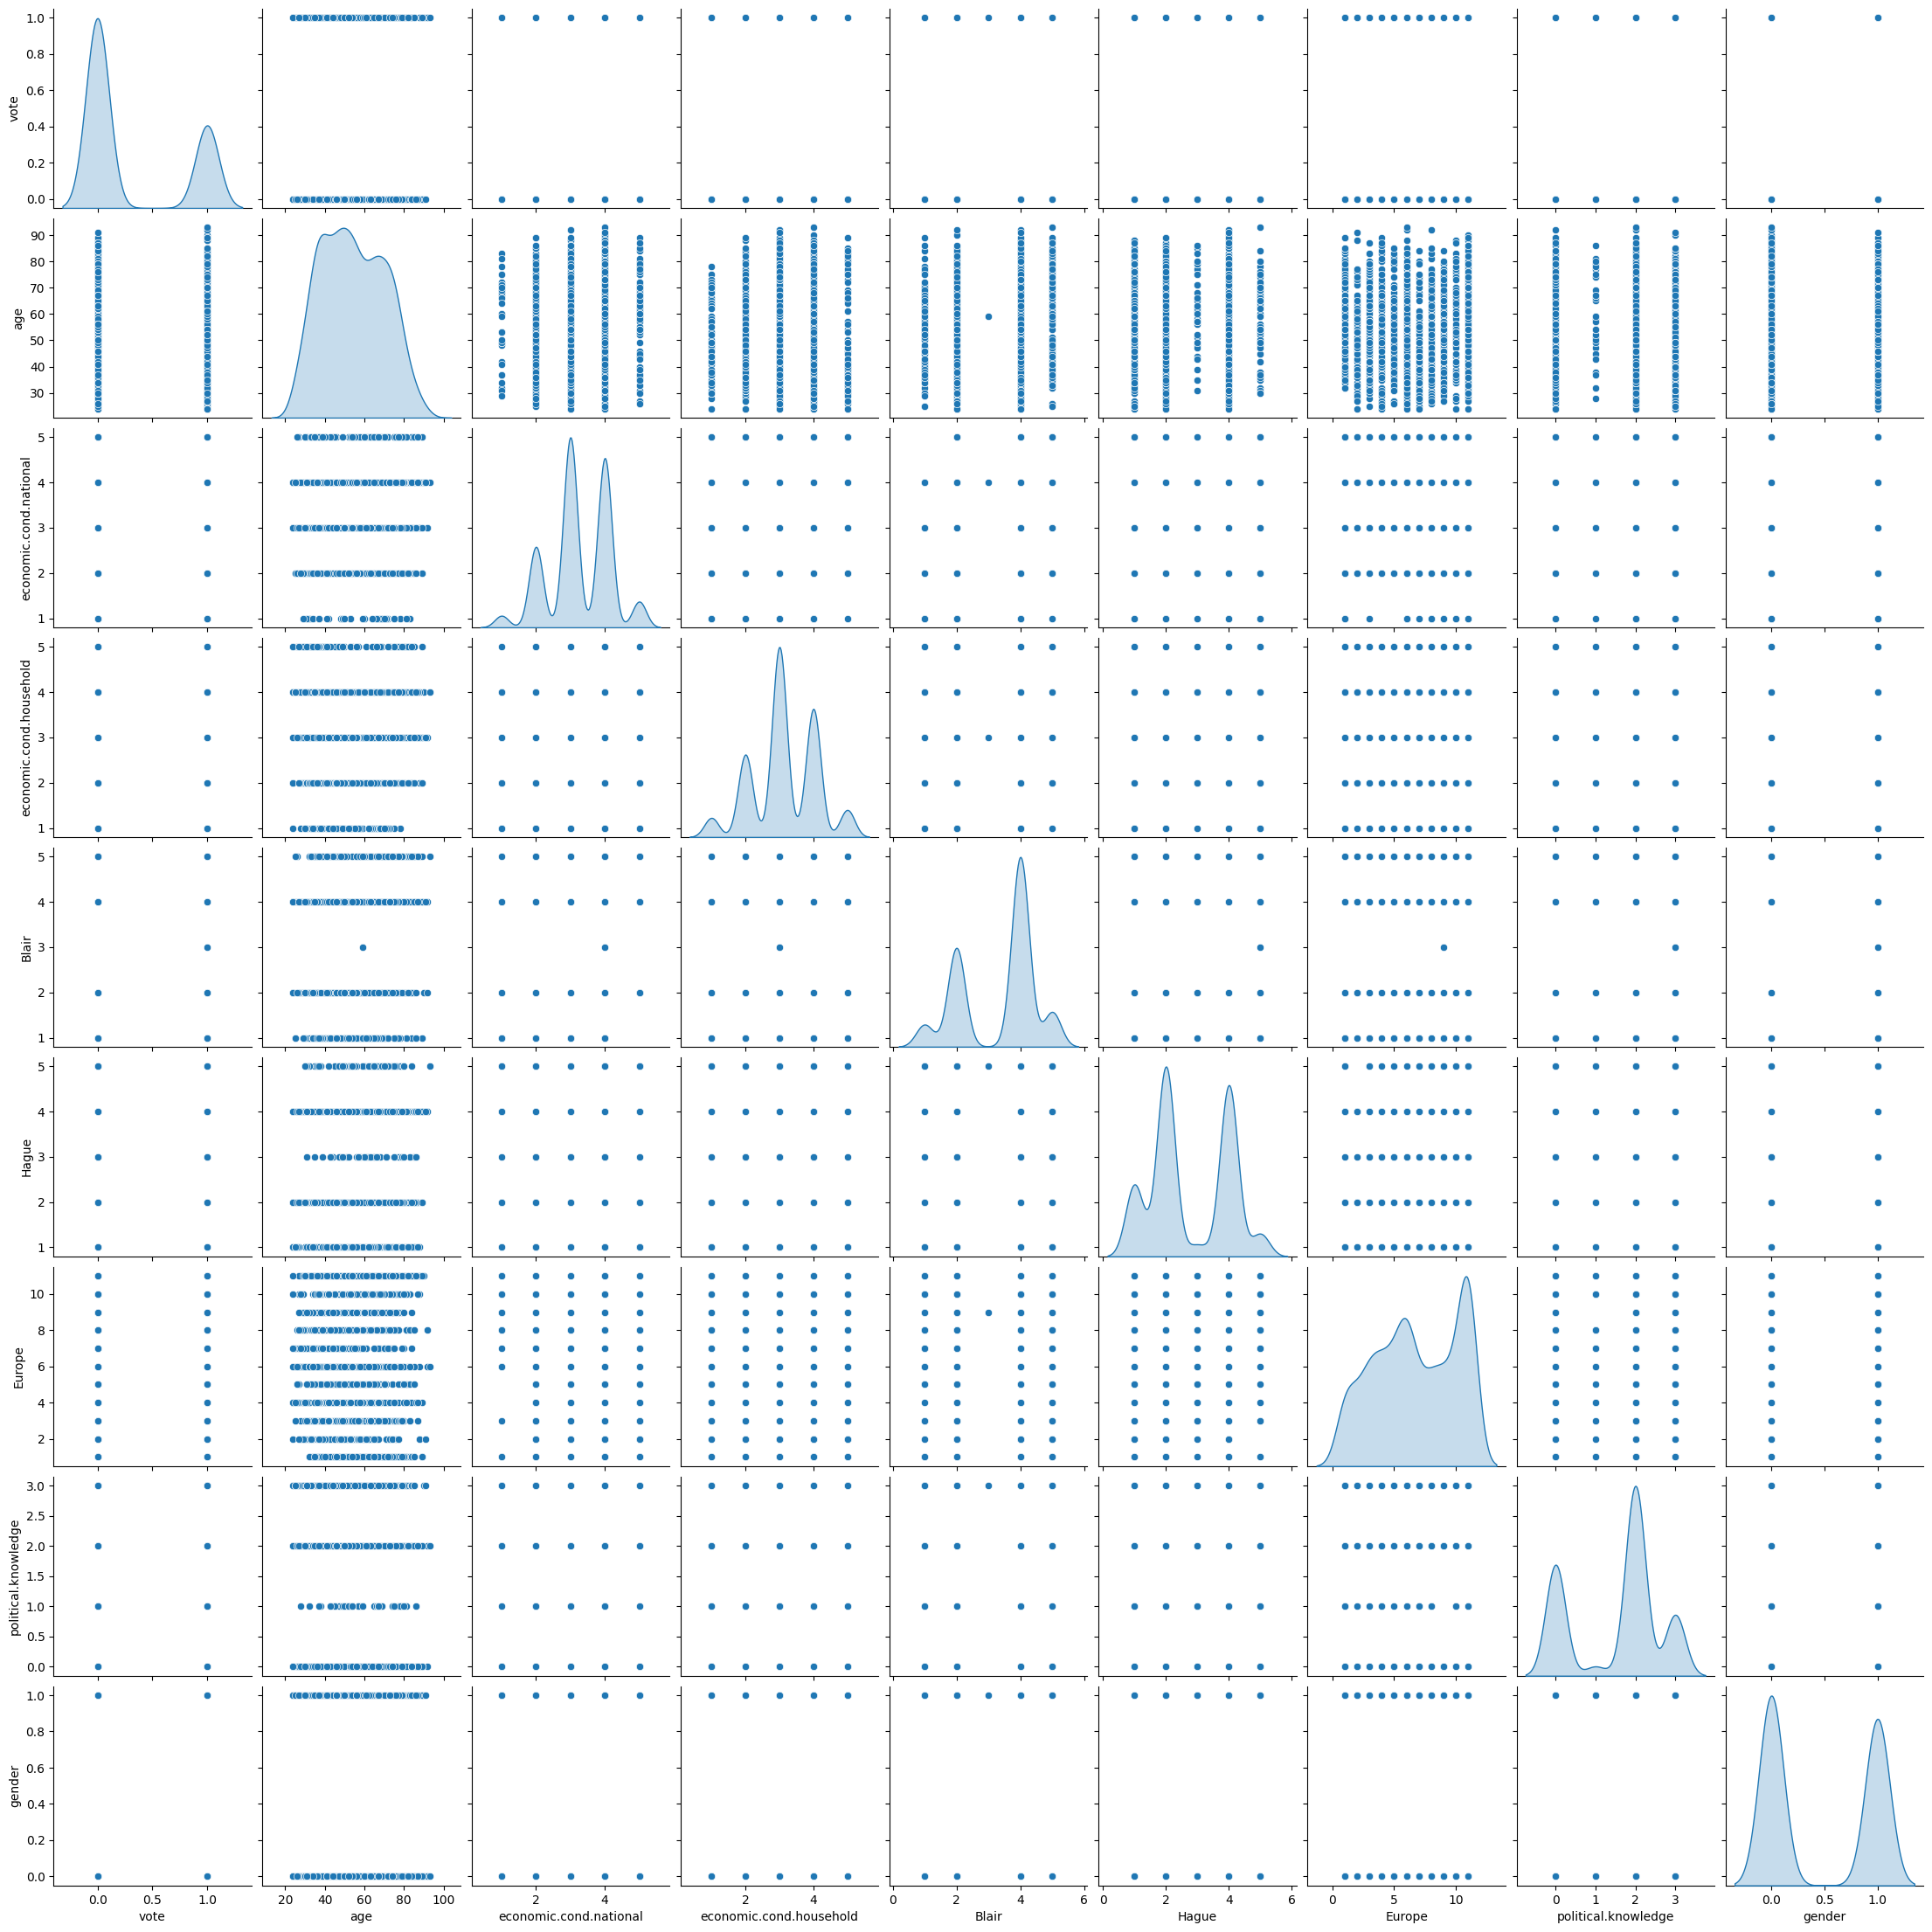

In [ ]:
df_attr = df.iloc[:, 0:10]
sns.pairplot(df_attr, diag_kind="kde")

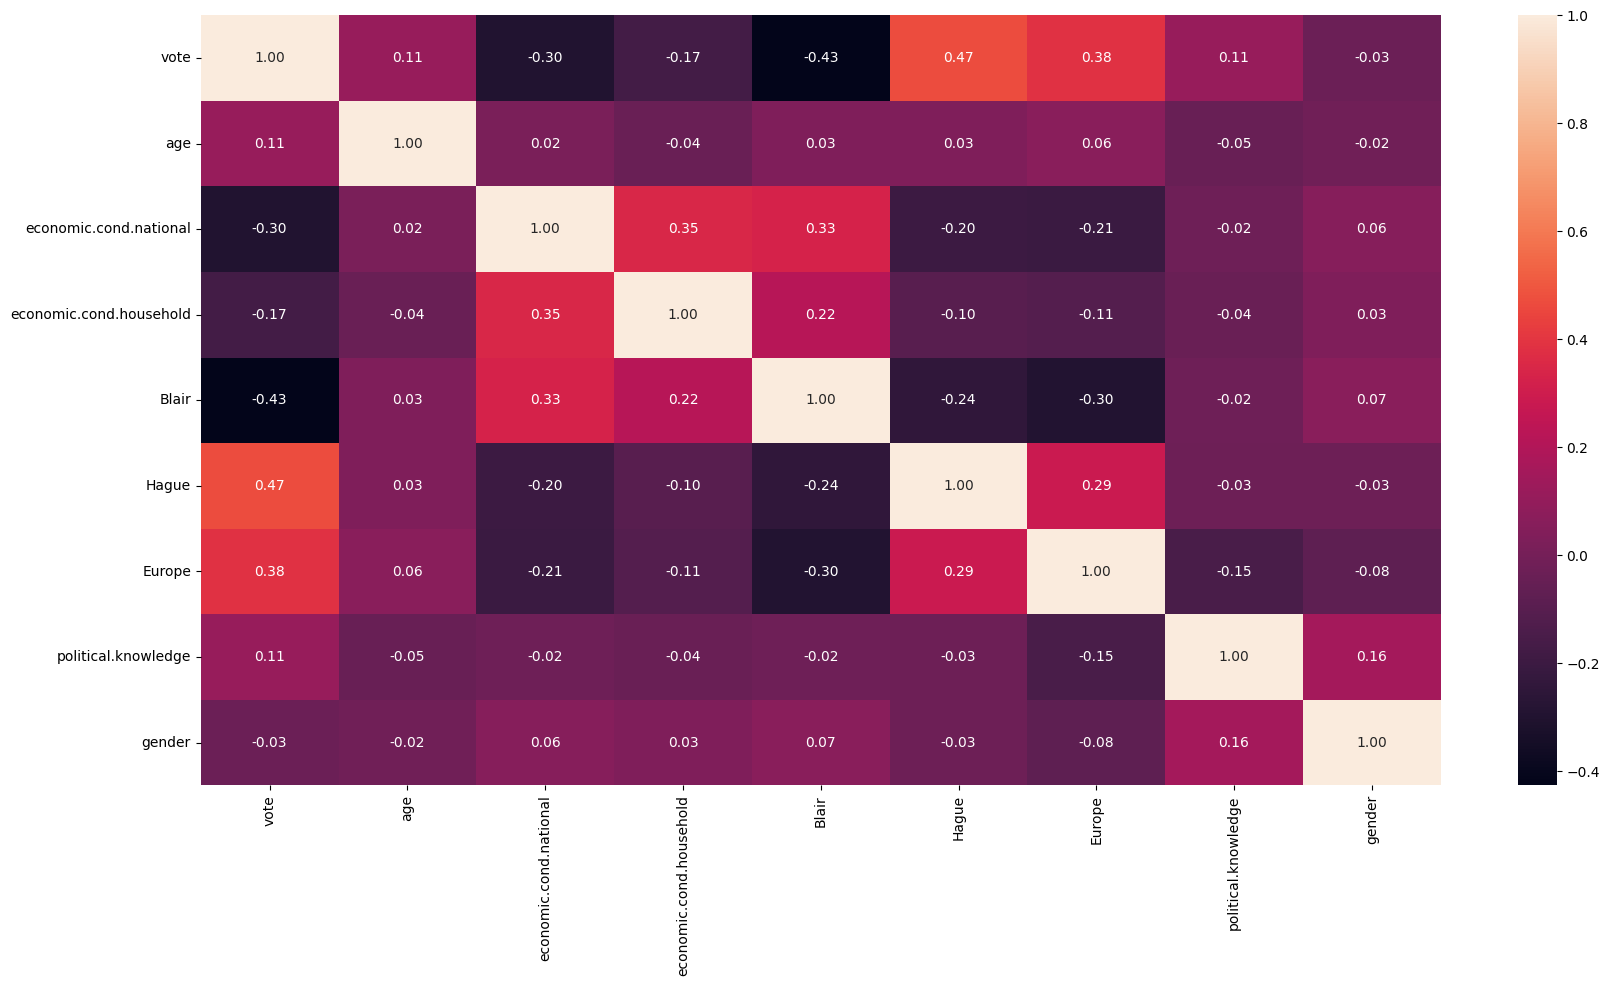

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True,fmt='.2f');

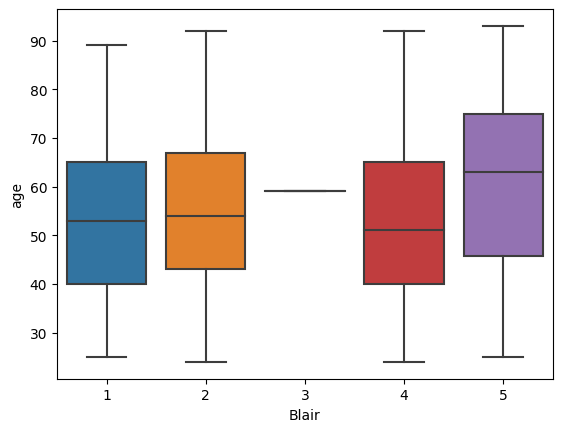

In [11]:
sns.boxplot(data=df, x='Blair', y='age');

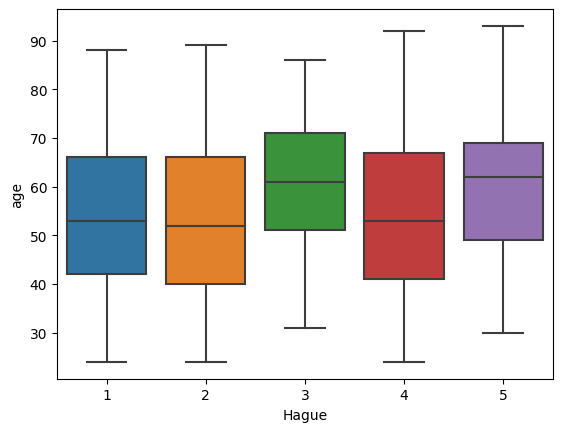

In [ ]:
sns.boxplot(data=df, x='Hague', y='age');

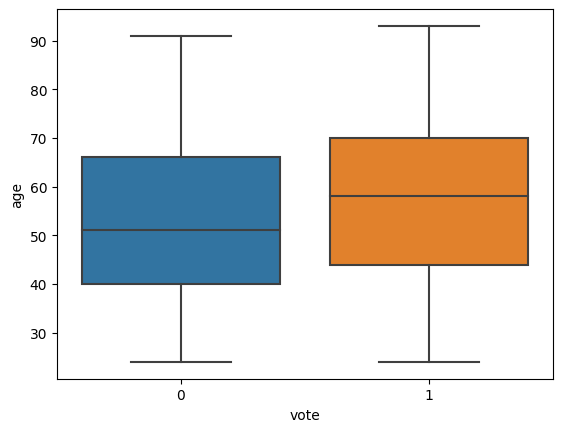

In [ ]:
sns.boxplot(data=df, x='vote', y='age');

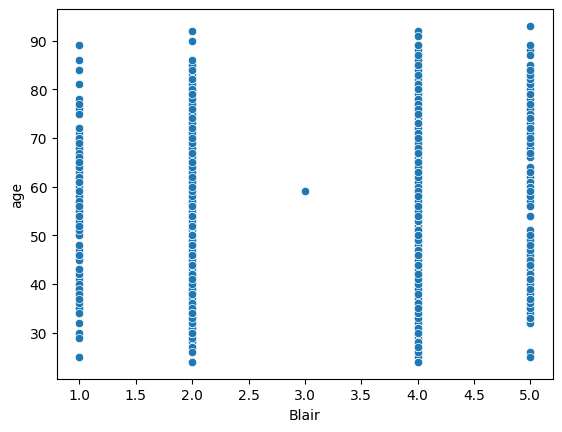

In [13]:
sns.scatterplot(data=df, x='Blair', y='age');

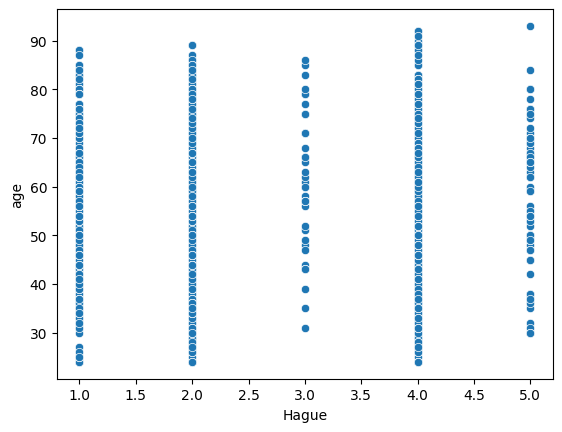

In [ ]:
sns.scatterplot(data=df, x='Hague', y='age');

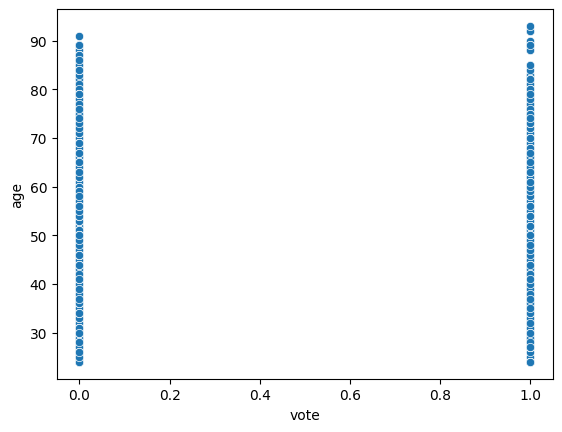

In [14]:
sns.scatterplot(data=df, x='vote', y='age');

<Axes: xlabel='vote', ylabel='count'>

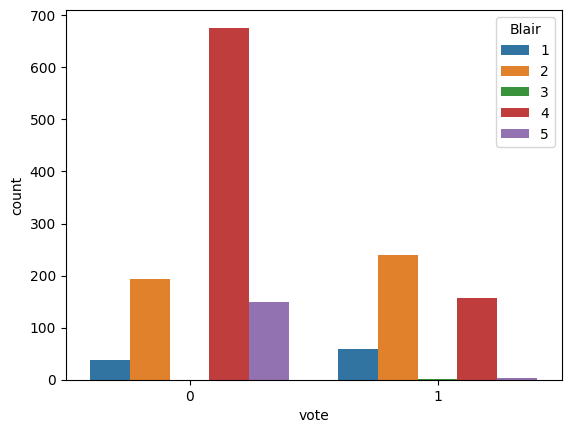

In [16]:
sns.countplot(data =df , x = "vote", hue = "Blair")

<Axes: xlabel='vote', ylabel='count'>

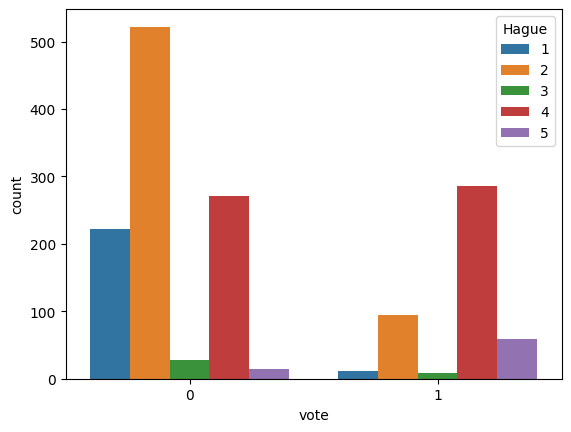

In [17]:
sns.countplot(data =df , x = "vote", hue = "Hague")

<Axes: xlabel='vote', ylabel='count'>

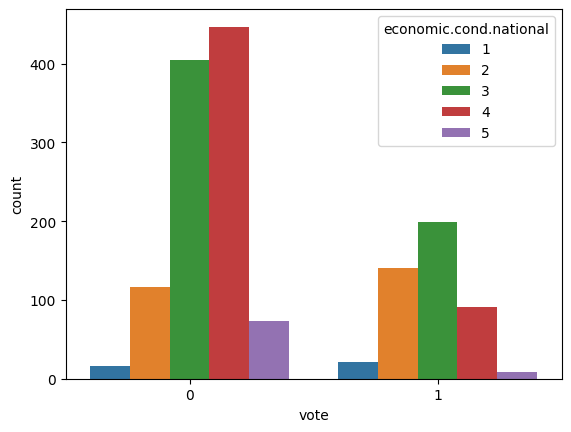

In [15]:
sns.countplot(data =df , x = "vote", hue = "economic.cond.national")

<Axes: xlabel='vote', ylabel='count'>

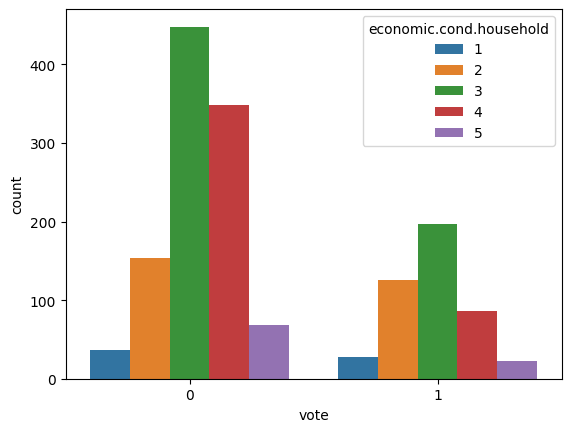

In [18]:
sns.countplot(data =df , x = "vote", hue = "economic.cond.household")

<Axes: xlabel='vote', ylabel='count'>

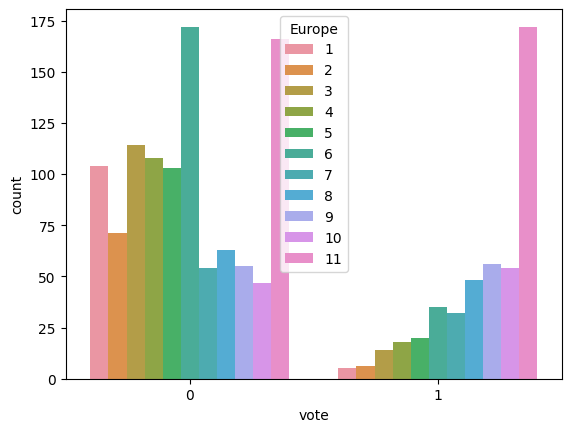

In [19]:
sns.countplot(data =df , x = "vote", hue = "Europe")

<Axes: xlabel='vote', ylabel='count'>

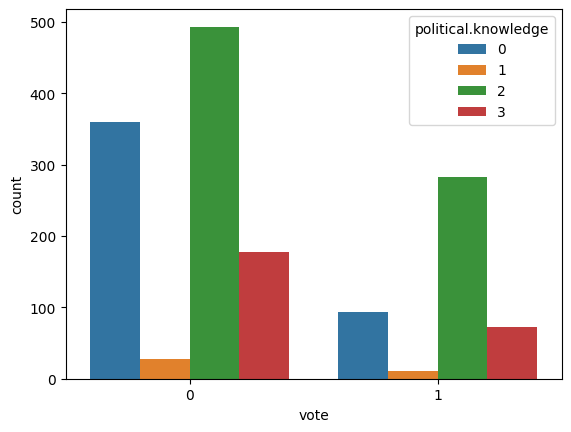

In [20]:
sns.countplot(data =df , x = "vote", hue = "political.knowledge")

<Axes: xlabel='vote', ylabel='count'>

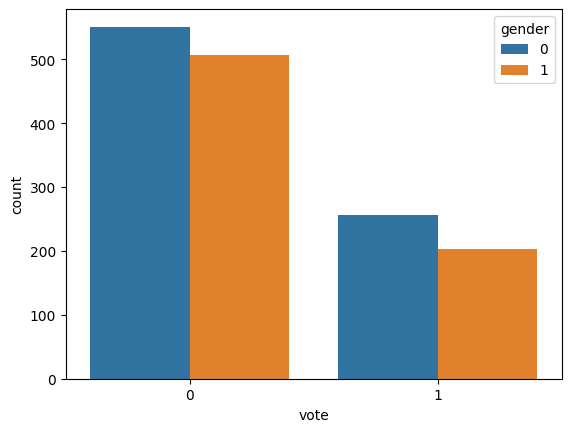

In [21]:
sns.countplot(data =df , x = "vote", hue = "gender")

# **1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).**

# **Data encoding and splitting**

In [8]:
num1=['age']

In [9]:
df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [10]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,0.275362,3,3,4,1,2,2,0
1,0,0.173913,4,4,4,4,5,2,1
2,0,0.159420,4,4,5,2,3,2,1
3,0,0.000000,4,2,2,1,4,0,0
4,0,0.246377,2,2,1,1,6,2,1


In [11]:
# independent variables
X = df.drop(["vote"], axis=1)
# dependent variable
y = df[["vote"]]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [13]:
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

In [16]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

# **1.4 Apply Logistic Regression and LDA (linear discriminant analysis).**

# **Logistic Regression and LDA**

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [17]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.831140350877193


In [ ]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, ytrain_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, ytrain_predict))

Confusion Matrix 
 [[686  68]
 [111 196]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Axes(0.125,0.11;0.62x0.77)


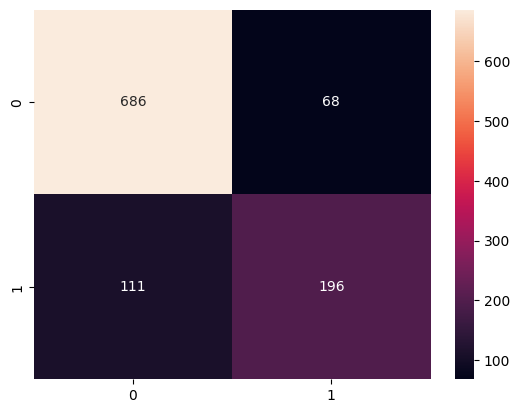

In [ ]:
print(sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True , fmt="2g"))

In [ ]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))

Confusion Matrix 
 [[268  35]
 [ 42 111]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.76      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [ ]:
print(mean_squared_error(ytrain_predict, y_train))

0.16870876531573986


In [ ]:
print(mean_squared_error(model.predict(X_test), y_test))

0.16885964912280702


AUC: 0.890


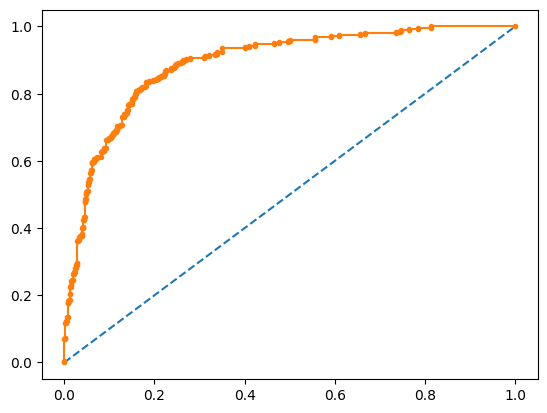

In [ ]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.');

AUC: 0.890


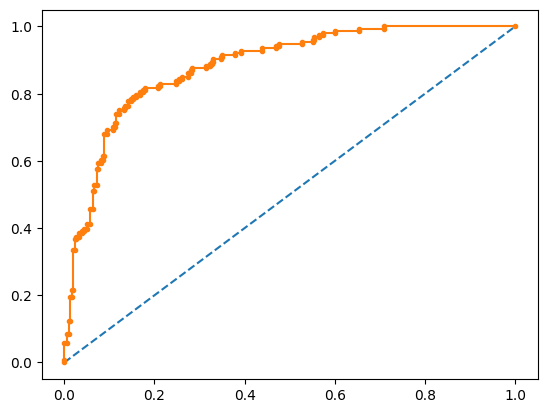

In [ ]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.');

**LDA**

In [18]:
#Build LDA Model
lda = LinearDiscriminantAnalysis()
model_1= lda.fit(X_train,y_train)

In [19]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model_1.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model_1.predict(X_test)

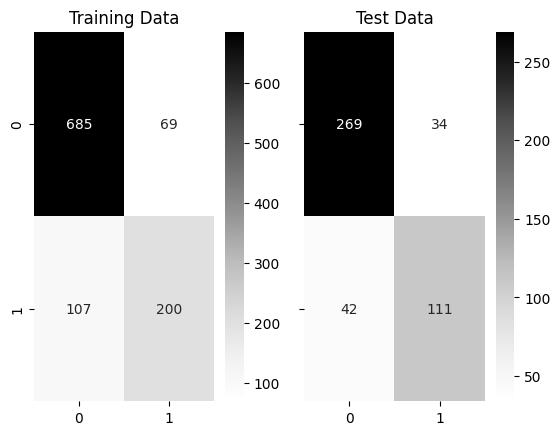

In [20]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [21]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.89      0.88       303
           1       0.77      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [22]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


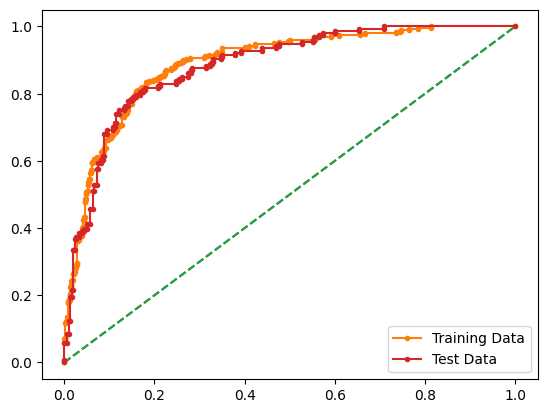

In [23]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# **1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.**

# **KNN and Naive Bayes**

**KNN**

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8539114043355325
[[689  65]
 [ 90 217]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       754
           1       0.77      0.71      0.74       307

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[268  35]
 [ 45 108]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.76      0.71      0.73       153

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [ ]:
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.928
AUC for the Test Data: 0.867


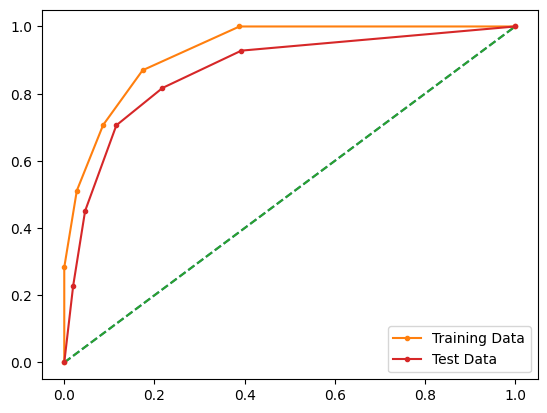

In [ ]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best');

**Naive Bayes**

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8350612629594723
[[675  79]
 [ 96 211]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.73      0.69      0.71       307

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [ ]:
y_test.value_counts()

vote
0       303
1       153
dtype: int64

In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[263  40]
 [ 41 112]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [ ]:
# Training Data Probability Prediction
pred_prob_train = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = NB_model.predict_proba(X_test)

AUC for the Training Data: 0.888
AUC for the Test Data: 0.876


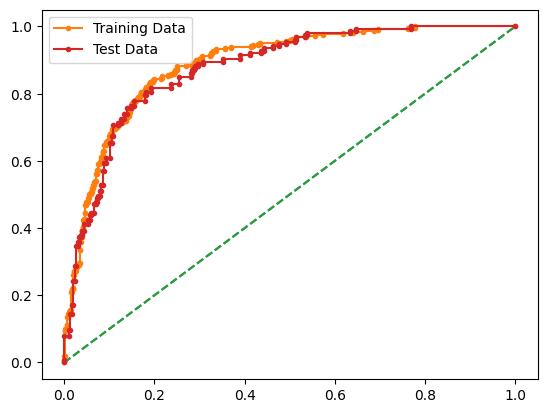

In [ ]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best');

# **1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting**

# **AdaBoost and Bagging Classifier with decision tree and random forest classifier**

**AdaBoosting**

In [ ]:
ADB_model = AdaBoostClassifier(n_estimators=101,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=101, random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8520263901979265
[[689  65]
 [ 92 215]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       754
           1       0.77      0.70      0.73       307

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [ ]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[268  35]
 [ 50 103]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.75      0.67      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [ ]:
# Training Data Probability Prediction
pred_prob_train = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.915
AUC for the Test Data: 0.877


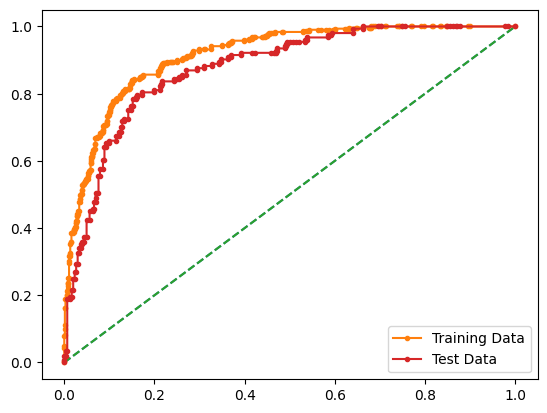

In [ ]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best');

**Decision Tree Classifier**

In [ ]:
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[754   0]
 [  0 307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [ ]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7872807017543859
[[259  44]
 [ 53 100]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       303
           1       0.69      0.65      0.67       153

    accuracy                           0.79       456
   macro avg       0.76      0.75      0.76       456
weighted avg       0.78      0.79      0.79       456



In [ ]:
# Training Data Probability Prediction
pred_prob_train = DT_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = DT_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.754


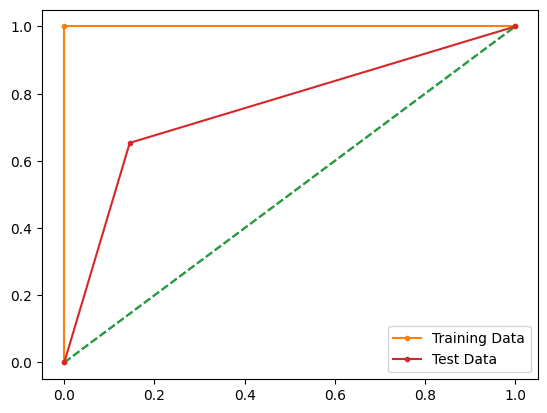

In [ ]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best');

**Random Forest Classifier**

In [ ]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[754   0]
 [  0 307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[275  28]
 [ 51 102]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       303
           1       0.78      0.67      0.72       153

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



In [ ]:
# Training Data Probability Prediction
pred_prob_train = RF_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = RF_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.895


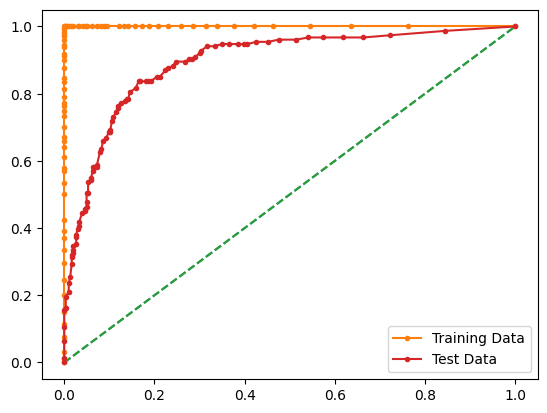

In [ ]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best');

**Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[754   0]
 [  0 307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [ ]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[265  38]
 [ 47 106]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       303
           1       0.74      0.69      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [ ]:
# Training Data Probability Prediction
pred_prob_train = Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = Bagging_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.880


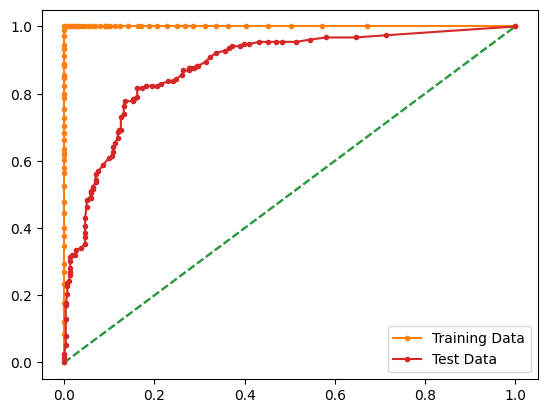

In [ ]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best');

# **1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.**

**We have performed performance of Predictions for each model along with model building.**

# **Q8) Based on these predictions, what are the insights**

1)Comparing all the performance measure, Naïve Bayes model is performing best. Although there are some other models such as KNN and  AdaBoosting which is performing almost same as that of Naïve Bayes. But Naïve Bayes model is very consistent when train and test results are compared with each other. Along with other parameters such as Recall value, AUC_SCORE and AUC_ROC_Curve, those results were pretty good is this model.

2)Labour party is performing better than Conservative from huge margin.

3)Female voters turn out is greater than the male voters.

4)Those who have better national economic conditions are preferring to vote for Labour party.

5)Persons having higher Eurosceptic sentiments conservative party are preferring to vote for Conservative party.

6)Those who have higher political knowledge have voted for Conservative party

7)Looking at the assessment for both the leaders, Labour Leader is performing well as he has got better ratings in assessment.